### Import data from Excel

In [117]:
import time
start_time = time.time()

In [118]:

import pandas as pd


# Importing Pincodes
df = pd.read_excel('pincode.xlsx')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157126 entries, 0 to 157125
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CircleName    157126 non-null  object
 1   RegionName    157073 non-null  object
 2   DivisionName  157124 non-null  object
 3   OfficeName    157126 non-null  object
 4   Pincode       157126 non-null  int64 
 5   OfficeType    157126 non-null  object
 6   Delivery      157126 non-null  object
 7   District      157126 non-null  object
 8   StateName     157126 non-null  object
 9   Latitude      148288 non-null  object
 10  Longitude     148283 non-null  object
dtypes: int64(1), object(10)
memory usage: 13.2+ MB


### Import Required Libraries

In [119]:
import numpy as np
import re
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from math import radians, cos, sin, asin, sqrt
from sklearn.metrics import silhouette_score

### Drop Null Rows

In [120]:
df.dropna(inplace=True)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 148226 entries, 0 to 157125
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CircleName    148226 non-null  object
 1   RegionName    148226 non-null  object
 2   DivisionName  148226 non-null  object
 3   OfficeName    148226 non-null  object
 4   Pincode       148226 non-null  int64 
 5   OfficeType    148226 non-null  object
 6   Delivery      148226 non-null  object
 7   District      148226 non-null  object
 8   StateName     148226 non-null  object
 9   Latitude      148226 non-null  object
 10  Longitude     148226 non-null  object
dtypes: int64(1), object(10)
memory usage: 13.6+ MB


,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.8562
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5611,77.8572
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2455,78.2477


### Transform Latitude and Longitude Codes into float type. This is doen by removing N, E, S, W notations after them and type casting as float. Also, Lat and Long values beyond +-90 are removed as per convention.

In [121]:
# Regular expression pattern to match latitude & Longitude values
pattern = r"-?\d+(?:\.\d+)?(?: [NSEW])?"

df1 = df.copy()

# Define a function to extract the latitude & Longitude values
def extract_numerical(x):
    try:
        match = re.findall(pattern, x)[0]
        return float(match.split()[0])
    except:
        print(x)

# Apply the function to the Latitude column
df1['Latitude'] = df1['Latitude'].astype(str).apply(extract_numerical)
df1['Longitude'] = df1['Longitude'].astype(str).apply(extract_numerical)

df1 = df1[(df1['Latitude'] >= -90) & (df1['Latitude'] <= 90)]
df1 = df1[(df1['Longitude'] >= -90) & (df1['Longitude'] <= 90)]

# Print the updated DataFrame
df1.info()
df1.describe()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 143335 entries, 0 to 157125
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CircleName    143335 non-null  object 
 1   RegionName    143335 non-null  object 
 2   DivisionName  143335 non-null  object 
 3   OfficeName    143335 non-null  object 
 4   Pincode       143335 non-null  int64  
 5   OfficeType    143335 non-null  object 
 6   Delivery      143335 non-null  object 
 7   District      143335 non-null  object 
 8   StateName     143335 non-null  object 
 9   Latitude      143335 non-null  float64
 10  Longitude     143335 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 13.1+ MB


,Pincode,Latitude,Longitude
count,143335.000000,143335.000000,143335.000000
mean,489938.341556,22.617774,77.595212
std,205320.824559,10.094072,10.935438
min,110001.000000,0.000000,0.000000
25%,322025.000000,17.278291,75.653651
50%,493196.000000,22.512428,78.321936
75%,639114.000000,26.330000,82.326198
max,999999.000000,89.265000,89.997669


### Plotting Hist plot for latitude & Longitude values for Outlier analysis

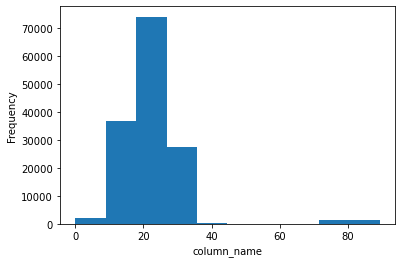

In [122]:
plt.hist(df1['Latitude'], bins=10)
plt.xlabel('column_name')
plt.ylabel('Frequency')
plt.show()

### Removing outliers by applying (mean +- 2* std.deviation) as limits

In [123]:
summary_stats = df1['Latitude'].describe()
mean_value = summary_stats['mean']
std_dev_value = summary_stats['std']
min_value = summary_stats['min']
max_value = summary_stats['max']

lower_limit = mean_value - 2 * std_dev_value
upper_limit = mean_value + 2 * std_dev_value

df1 = df1.drop(df1[(df1['Latitude'] < lower_limit) | (df1['Latitude'] > upper_limit)].index)

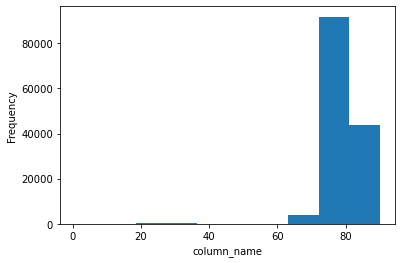

In [124]:
plt.hist(df1['Longitude'], bins=10)
plt.xlabel('column_name')
plt.ylabel('Frequency')
plt.show()

In [125]:
summary_stats = df1['Longitude'].describe()
mean_value = summary_stats['mean']
std_dev_value = summary_stats['std']
min_value = summary_stats['min']
max_value = summary_stats['max']

lower_limit = mean_value - 2 * std_dev_value
upper_limit = mean_value + 2 * std_dev_value

df1 = df1.drop(df1[(df1['Longitude'] < lower_limit) | (df1['Longitude'] > upper_limit)].index)

### Creating a separate Data frame for selected States only

In [126]:
state = ['TELANGANA', 'MAHARASTRA','KARNATAKA', 'ODISHA', 'KERALA']
#state = ['ANDHRA PRADESH']
df2 = df1[df1['StateName'].isin(state)]
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25688 entries, 138 to 157125
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CircleName    25688 non-null  object 
 1   RegionName    25688 non-null  object 
 2   DivisionName  25688 non-null  object 
 3   OfficeName    25688 non-null  object 
 4   Pincode       25688 non-null  int64  
 5   OfficeType    25688 non-null  object 
 6   Delivery      25688 non-null  object 
 7   District      25688 non-null  object 
 8   StateName     25688 non-null  object 
 9   Latitude      25688 non-null  float64
 10  Longitude     25688 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 2.4+ MB


,Pincode,Latitude,Longitude
count,25688.000000,25688.000000,25688.000000
mean,644057.366708,16.305025,79.480273
std,95899.024634,3.928627,4.093043
min,500001.000000,7.104306,67.569800
25%,573134.000000,13.070000,76.180000
50%,670631.000000,16.754031,77.647247
75%,755011.000000,19.912351,83.833322
max,999999.000000,40.741211,88.528734


### Deviation in the data at the state level is observed. Even though outliers have been removed from the total dataset, state level data still has many outliers. So, performing outlier removal again at the state-level 

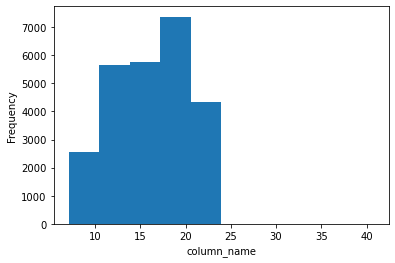

In [127]:
plt.hist(df2['Latitude'], bins=10)
plt.xlabel('column_name')
plt.ylabel('Frequency')
plt.show()

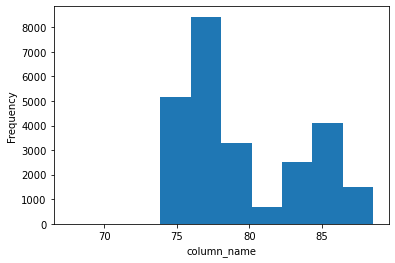

In [128]:
plt.hist(df2['Longitude'], bins=10)
plt.xlabel('column_name')
plt.ylabel('Frequency')
plt.show()

In [129]:
def filter_outliers(df):
    # filter outliers for latitude
    lat_summary = df['Latitude'].describe()
    lat_mean = lat_summary['mean']
    lat_std_dev = lat_summary['std']
    lat_lower_limit = lat_mean - 2 * lat_std_dev
    lat_upper_limit = lat_mean + 2 * lat_std_dev
    df = df.drop(df[(df['Latitude'] < lat_lower_limit) | (df['Latitude'] > lat_upper_limit)].index)
    
    # filter outliers for longitude
    lon_summary = df['Longitude'].describe()
    lon_mean = lon_summary['mean']
    lon_std_dev = lon_summary['std']
    lon_lower_limit = lon_mean - 2 * lon_std_dev
    lon_upper_limit = lon_mean + 2 * lon_std_dev
    df = df.drop(df[(df['Longitude'] < lon_lower_limit) | (df['Longitude'] > lon_upper_limit)].index)
    
    return df



# Group by StateName and apply the filter_outliers function to each group
filtered_dfs = [group_df.groupby('StateName').apply(filter_outliers) for _, group_df in df2.groupby('StateName')]

# Concatenate the filtered dataframes back into one dataframe
filtered_df = pd.concat(filtered_dfs)


### Performing K-means Clustering on the state-level data and selecting optimal number of clusters using Elbow method

In [130]:

# # Standardize the latitude and longitude data
# scaler = StandardScaler()
# X = scaler.fit_transform(filtered_df.iloc[:, [-1, -2]].values)

# # Use the elbow method to determine the optimal number of clusters
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()



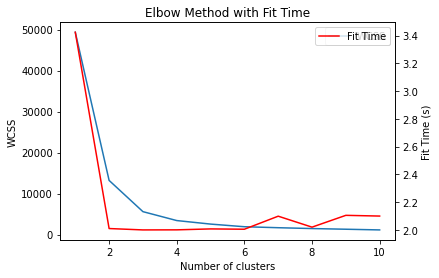

In [131]:
# Standardize the latitude and longitude data
scaler = StandardScaler()
X = scaler.fit_transform(filtered_df.iloc[:, [-1, -2]].values)

# Use the elbow method to determine the optimal number of clusters
wcss = []
fit_times = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    start_time = time.time()
    kmeans.fit(X)
    end_time = time.time()
    fit_times.append(end_time - start_time)
    wcss.append(kmeans.inertia_)
    
fig, ax1 = plt.subplots()

# Plot the elbow curve
ax1.plot(range(1, 11), wcss, label='WCSS')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS')

# Plot the fit times
ax2 = ax1.twinx()
ax2.plot(range(1, 11), fit_times, color='red', label='Fit Time')
ax2.set_ylabel('Fit Time (s)')

# Add legend and title
ax1.legend(loc='best')
ax2.legend(loc='best')
plt.title('Elbow Method with Fit Time')
plt.show()


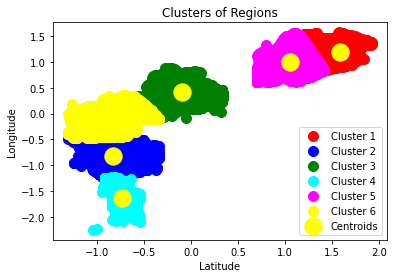

In [132]:
# Choose the optimal number of clusters based on the elbow plot
# In this case, the optimal number of clusters is 4

# Fit the K-Means algorithm to the data with the chosen number of clusters
n=6
kmeans = KMeans(n_clusters=n, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
filtered_df['Cluster'] = kmeans.labels_

# Visualize the results
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black', 'gray']
for i in range(n):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=100, c=colors[i], label='Cluster {}'.format(i+1))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Regions')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

### Creating a dictionary for state - factory sets

In [133]:
factory_dict = {
    'Andhra Pradesh': 'Guntur',
    'Arunachal Pradesh': 'Itanagar',
    'Assam': 'Guwahati',
    'Bihar': 'Patna',
    'Chhattisgarh': 'Raipur',
    'Goa': 'Panaji',
    'Gujarat': 'Ahmedabad',
    'Haryana': 'Gurugram',
    'Himachal Pradesh': 'Shimla',
    'Jharkhand': 'Ranchi',
    'Karnataka': 'Bengaluru',
    'Kerala': 'Kochi',
    'Madhya Pradesh': 'Indore',
    'Maharashtra': 'Mumbai',
    'Manipur': 'Imphal',
    'Meghalaya': 'Shillong',
    'Mizoram': 'Aizawl',
    'Nagaland': 'Kohima',
    'Odisha': 'Bhubaneswar',
    'Punjab': 'Ludhiana',
    'Rajasthan': 'Jaipur',
    'Sikkim': 'Gangtok',
    'Tamil Nadu': 'Chennai',
    'Telangana': 'Hyderabad',
    'Tripura': 'Agartala',
    'Uttar Pradesh': 'Lucknow',
    'Uttarakhand': 'Dehradun',
    'West Bengal': 'Kolkata'
}

new_dict = {}

for key, value in factory_dict.items():
    new_key = key.upper()
    new_value = value.upper()
    new_dict[new_key] = new_value

print(new_dict)

{'ANDHRA PRADESH': 'GUNTUR', 'ARUNACHAL PRADESH': 'ITANAGAR', 'ASSAM': 'GUWAHATI', 'BIHAR': 'PATNA', 'CHHATTISGARH': 'RAIPUR', 'GOA': 'PANAJI', 'GUJARAT': 'AHMEDABAD', 'HARYANA': 'GURUGRAM', 'HIMACHAL PRADESH': 'SHIMLA', 'JHARKHAND': 'RANCHI', 'KARNATAKA': 'BENGALURU', 'KERALA': 'KOCHI', 'MADHYA PRADESH': 'INDORE', 'MAHARASHTRA': 'MUMBAI', 'MANIPUR': 'IMPHAL', 'MEGHALAYA': 'SHILLONG', 'MIZORAM': 'AIZAWL', 'NAGALAND': 'KOHIMA', 'ODISHA': 'BHUBANESWAR', 'PUNJAB': 'LUDHIANA', 'RAJASTHAN': 'JAIPUR', 'SIKKIM': 'GANGTOK', 'TAMIL NADU': 'CHENNAI', 'TELANGANA': 'HYDERABAD', 'TRIPURA': 'AGARTALA', 'UTTAR PRADESH': 'LUCKNOW', 'UTTARAKHAND': 'DEHRADUN', 'WEST BENGAL': 'KOLKATA'}


### Selecting the pincode closest to the centroid of all pincodes in the factory location, for use as factory pincode

In [134]:
all_factory_locations = pd.DataFrame(columns=['State', 'Latitude', 'Longitude'])
for state in state:
    try:
        districts = filtered_df[filtered_df['District'].str.contains(new_dict[state])]
    
        # Define a function to find the nearest location to the centroid in a district as factory location
        def find_factory_location(locations):
            # Calculate the centroid of all the locations
            centroid = np.mean(locations, axis=0)

            # Calculate pairwise distances between each location and the centroid
            distances = squareform(pdist(locations))

            # Find the index of the location with the smallest distance to the centroid
            nearest_index = np.argmin(np.sum(np.square(locations - centroid), axis=1))

            # Assign the location with the smallest distance to the centroid as the factory location
            factory_location = locations[nearest_index]

            return factory_location

        locations = districts[['Latitude', 'Longitude']].values

        factory= find_factory_location(locations)
        factory_location = pd.DataFrame({'State': [state], 'Latitude': [factory[0]], 'Longitude': [factory[1]]})
        all_factory_locations = all_factory_locations.append(factory_location)
    
    except:
        continue

print(all_factory_locations)

       State   Latitude  Longitude
0  TELANGANA  17.505333  78.518556
0  KARNATAKA  13.016833  77.583278


### Solving TSP using nearest neighbor Algorithm to each cluster

Total distance for Cluster 0: 13814.66 km
Total distance for Cluster 1: 18347.21 km
Total distance for Cluster 2: 15500.62 km
Total distance for Cluster 3: 9205.19 km
Total distance for Cluster 4: 13447.50 km
Total distance for Cluster 5: 17625.34 km
Total combined distance of all clusters: 87940.52522810554


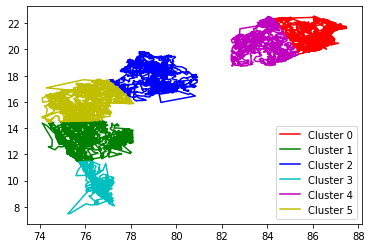

In [135]:
from scipy.spatial.distance import pdist, squareform
from math import radians, cos, sin, asin, sqrt

# Define a function to compute the nearest neighbor tour
def nearest_neighbor(coords):
    # Calculate pairwise distances between points
    distances = squareform(pdist(coords))
    
    # Find the centroid of the cluster
    centroid = np.mean(coords, axis=0)
    
    # Find the pin code closest to the centroid
    depot_index = np.argmin(np.sum(np.square(coords - centroid), axis=1))
    
    # Start at the depot
    tour = [depot_index]
    remaining = set(range(len(coords)))
    remaining.remove(depot_index)
    
    # Find the nearest neighbor until all points are visited
    while remaining:
        last = tour[-1]
        nearest = min(remaining, key=lambda x: distances[last, x])
        tour.append(nearest)
        remaining.remove(nearest)
    
    # Add the depot as the last point in the tour
    tour.append(depot_index)
    
    # Calculate the tour length in kilometers using the Haversine formula
    km_distances = []
    for i in range(len(coords)):
        lat1, lon1 = coords[tour[i]]
        lat2, lon2 = coords[tour[i+1]]
        # Convert decimal degrees to radians
        lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
        # Haversine formula
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
        c = 2 * asin(sqrt(a))
        # Radius of earth in kilometers
        km = 6371
        km_distances.append(c * km)
    
    # Return the tour and its length in kilometers
    return tour, sum(km_distances), coords[depot_index]

# Group the pin codes by cluster
groups = filtered_df.groupby('Cluster')

# Solve TSP for each cluster
tours = {}
depots = {}
distance_clusters = 0
for name, group in groups:
    coords = group[['Latitude', 'Longitude']].values
    tour, distance, depot = nearest_neighbor(coords)
    tours[name] = {'coords': coords, 'tour': tour, 'distance': distance, 'depot': depot}
    depots[name] = depot
    tours[name]['distance'] = distance
    print(f"Total distance for Cluster {name}: {distance:.2f} km")
    distance_clusters = distance + distance_clusters
    
print('Total combined distance of all clusters:', distance_clusters)

# Plot the tours for each cluster
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'gray', 'navy', 'olive', 'teal']

for name, tour in tours.items():
    plt.plot(np.append(tour['depot'][1], tour['coords'][tour['tour'], 1]), 
             np.append(tour['depot'][0], tour['coords'][tour['tour'], 0]), 
             c=colors[name], label='Cluster {}'.format(name))

plt.legend()
plt.show()

### Storing the depots locations in each cluster in a new dataframe

In [ ]:
df_depots = pd.DataFrame.from_dict(depots, orient='index', columns=['Latitude', 'Longitude'])

# merge df_depots with filtered_df on latitude and longitude
merged_df = pd.merge(df_depots, filtered_df, on=['Latitude', 'Longitude'])

# add the state column to df_depots
df_depots['State'] = merged_df['StateName']

df_depots

### Solving TSP for factory and Depot locations

In [ ]:
import pandas as pd
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
import numpy as np
import math

# Create distance matrix between locations
locations = np.vstack((all_factory_locations[["Latitude", "Longitude"]].values, df_depots[["Latitude", "Longitude"]].values))
distance_matrix = distance_matrix(locations, locations)

# Solve TSP using nearest neighbor algorithm
unvisited = set(range(1, len(locations)))
current_node = 0
route = [0]

while unvisited:
    nearest_node = min(unvisited, key=lambda x: distance_matrix[current_node][x])
    route.append(nearest_node)
    unvisited.remove(nearest_node)
    current_node = nearest_node

route.append(0)

def calculate_distance(locations):
    R = 6371  # radius of the earth in km
    distance = 0
    for i in range(len(locations)-1):
        lat1, lon1 = locations[i]
        lat2, lon2 = locations[i+1]
        dlat = math.radians(lat2 - lat1)
        dlon = math.radians(lon2 - lon1)
        a = math.sin(dlat/2) * math.sin(dlat/2) + \
            math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * \
            math.sin(dlon/2) * math.sin(dlon/2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        distance += R * c
    return distance

route_locations = [locations[i] for i in route]
distance_factory = calculate_distance(route_locations)
print(f"The total distance of the route is {distance_factory:.2f} km.")

# # Print solution
# print("Optimal route:")
# for i in route:
#     print(locations[i])

    
# Plot solution
fig, ax = plt.subplots()
ax.plot(locations[route][:, 1], locations[route][:, 0], 'o-', markersize=8, linewidth=2)
# ax.plot(locations[0, 1], locations[0, 0], markersize=8)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Optimal route")
plt.show()

### Distance of whole tour at cluster level + Depot-factory level 

In [ ]:
Total_distance = distance_clusters + distance_factory
print('Total distance in Km:',Total_distance)
print('No. of Clusters:', n)

In [ ]:
end_time = time.time()
total_time = end_time - start_time
print(f"Total time taken: {total_time} seconds")